# DNN Practice - Week 3
**Environment:** Python 3.12 (dnn-py312) with PyTorch 2.5.1 + CUDA 12.1

This notebook demonstrates deep neural network implementation using PyTorch with CUDA support.

In [8]:
# Verify CUDA is available
import torch
print(f'PyTorch version: {torch.__version__}')
print(f'CUDA available: {torch.cuda.is_available()}')
if torch.cuda.is_available():
    print(f'CUDA version: {torch.version.cuda}')
    print(f'Device name: {torch.cuda.get_device_name(0)}')
    print(f'Device count: {torch.cuda.device_count()}')

PyTorch version: 2.5.1+cu121
CUDA available: True
CUDA version: 12.1
Device name: NVIDIA GeForce RTX 3050 Laptop GPU
Device count: 1


In [9]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

In [48]:
def my_func(a, b, n_samples, noise_var):
    x = np.linspace(a, b, n_samples)
    y = 2**np.cos(x**2) + np.random.normal(0, noise_var, n_samples)
    return x.reshape(-1, 1), y.reshape(-1, 1)

Try with noise_var = 0, 0.1, 0.5

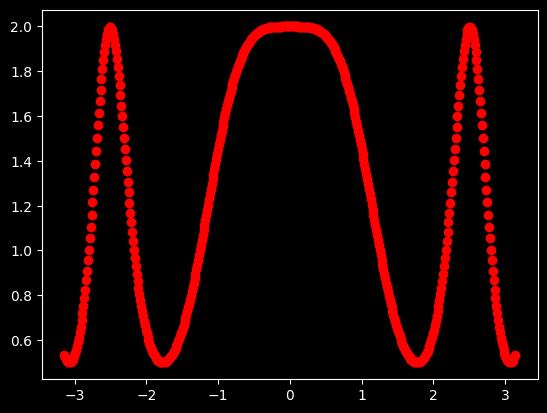

In [50]:
# Use a range for x values
X_np, y_np = my_func(-np.pi, np.pi, 500, 0.0)

#X_np, y_np = my_func(-np.pi, np.pi, 500, 0.1)
#X_np, y_np = my_func(-np.pi, np.pi, 500, 0.5)

plt.plot(X_np, y_np, 'ro')
plt.show()

In [5]:
X = torch.from_numpy(X_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

input_size = n_features
output_size = 1

Try with the commented lines

In [6]:
class DNN(nn.Module):
    def __init__(self, n):
        super(DNN, self).__init__()
        
        # Número de capas (L = número de elementos en n - 1)
        self.L = len(n) - 1
        
        # Función de activación: guardamos la clase, instanciamos por capa
        #actcls = nn.Sigmoid
        #actcls = nn.ReLU
        actcls = nn.Tanh
        
        layers = list()
        # Construye las capas ocultas con su función de activación
        for i in range(self.L - 1):
            layers.append((f'l_{i+1}', nn.Linear(n[i], n[i+1])))  # Capa lineal
            layers.append((f'actfunc_{i+1}', actcls()))          # Activación (nueva instancia por capa)
        
        # Última capa (sin activación)
        layers.append((f'l_{self.L}', nn.Linear(n[-2], n[-1])))
        self.layers = nn.Sequential(OrderedDict(layers))  # Secuencia ordenada de capas
        
    def forward(self, x):
        # Propagación hacia adelante: aplica todas las capas secuencialmente
        return self.layers(x)
    

#model = DNN(n = [input_size, output_size])
#model = DNN(n = [input_size, 20, output_size])
#model = DNN(n = [input_size, 20, 20, 20, 20, 20, output_size])
model = DNN(n = [input_size, 50, 50, output_size])

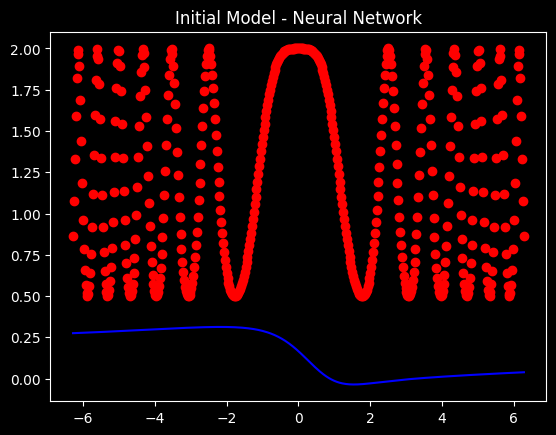

In [7]:
y_hat = model(X)

plt.plot(X_np, y_np, 'ro')
plt.plot(X_np, y_hat.detach().numpy(), 'b')
plt.title('Initial Model - Neural Network')
plt.show()
plt.close()

In [8]:
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 
criterion = nn.MSELoss()

In [9]:
MaxIters = 100000
for epoch in range(MaxIters):
    
    #Forward
    optimizer.zero_grad()
    y_hat = model(X)
    Err = criterion(y_hat, y)
    
    #Backward
    Err.backward()
    
    #Updating 
    optimizer.step()
    
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{MaxIters}], Loss: {Err.item():.4f}')

Epoch [100/100000], Loss: 0.2136
Epoch [200/100000], Loss: 0.1946
Epoch [300/100000], Loss: 0.1857
Epoch [400/100000], Loss: 0.1783
Epoch [300/100000], Loss: 0.1857
Epoch [400/100000], Loss: 0.1783
Epoch [500/100000], Loss: 0.1716
Epoch [600/100000], Loss: 0.1679
Epoch [500/100000], Loss: 0.1716
Epoch [600/100000], Loss: 0.1679
Epoch [700/100000], Loss: 0.1548
Epoch [800/100000], Loss: 0.1491
Epoch [700/100000], Loss: 0.1548
Epoch [800/100000], Loss: 0.1491
Epoch [900/100000], Loss: 0.1427
Epoch [1000/100000], Loss: 0.1359
Epoch [1100/100000], Loss: 0.1281
Epoch [900/100000], Loss: 0.1427
Epoch [1000/100000], Loss: 0.1359
Epoch [1100/100000], Loss: 0.1281
Epoch [1200/100000], Loss: 0.1221
Epoch [1300/100000], Loss: 0.1168
Epoch [1400/100000], Loss: 0.1118
Epoch [1200/100000], Loss: 0.1221
Epoch [1300/100000], Loss: 0.1168
Epoch [1400/100000], Loss: 0.1118
Epoch [1500/100000], Loss: 0.1067
Epoch [1600/100000], Loss: 0.1010
Epoch [1500/100000], Loss: 0.1067
Epoch [1600/100000], Loss: 0.1

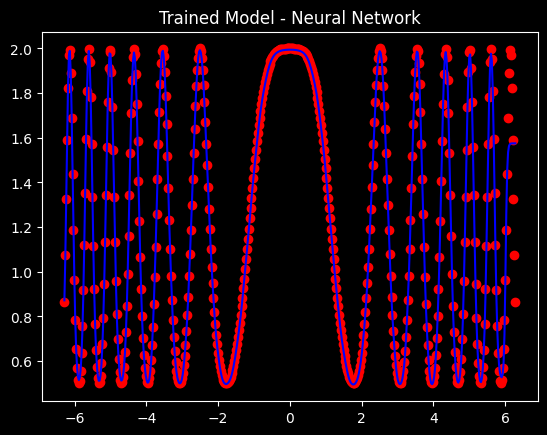

In [10]:
plt.plot(X_np, y_np, 'ro')
plt.plot(X_np, y_hat.detach().numpy(), 'b')
plt.title('Trained Model - Neural Network')
plt.show()

In [11]:
def Accuracy(y, y_hat):
    mse = torch.mean((y - y_hat)**2)
    return 1 / (1 + mse)

# Imprime metricas
print(f'Final Loss: {Err.item():.4f}')
print(f'Final Accuracy: {Accuracy(y, y_hat):.4f}')
print(f'RMSE: {torch.sqrt(torch.mean((y - y_hat)**2)).item():.4f}')


Final Loss: 0.0028
Final Accuracy: 0.9972
RMSE: 0.0528


### NN Classification

In [155]:
from sklearn.datasets import load_iris

# Cargar el dataset de iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

print("Shape de X_iris:", X_iris.shape)
print("Shape de y_iris:", y_iris.shape)
print("Clases:", iris.target_names)

Shape de X_iris: (150, 4)
Shape de y_iris: (150,)
Clases: ['setosa' 'versicolor' 'virginica']


In [156]:
# Pasar a Polars
import polars as pl
df_iris = pl.DataFrame(X_iris, schema=iris.feature_names)
df_iris = df_iris.with_columns([
    pl.Series("target", y_iris)
])

In [157]:
df_iris

sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
f64,f64,f64,f64,i64
5.1,3.5,1.4,0.2,0
4.9,3.0,1.4,0.2,0
4.7,3.2,1.3,0.2,0
4.6,3.1,1.5,0.2,0
5.0,3.6,1.4,0.2,0
…,…,…,…,…
6.7,3.0,5.2,2.3,2
6.3,2.5,5.0,1.9,2
6.5,3.0,5.2,2.0,2


In [158]:
# Split data
from sklearn.model_selection import train_test_split
# Prepare features and targets as numpy arrays
features = df_iris.drop("target")
targets = df_iris.select("target")

# Split the data into train and test sets, stratified by target
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42, stratify=targets)
X_train, X_test

(shape: (120, 4)
 ┌───────────────────┬──────────────────┬───────────────────┬──────────────────┐
 │ sepal length (cm) ┆ sepal width (cm) ┆ petal length (cm) ┆ petal width (cm) │
 │ ---               ┆ ---              ┆ ---               ┆ ---              │
 │ f64               ┆ f64              ┆ f64               ┆ f64              │
 ╞═══════════════════╪══════════════════╪═══════════════════╪══════════════════╡
 │ 4.4               ┆ 2.9              ┆ 1.4               ┆ 0.2              │
 │ 4.9               ┆ 2.5              ┆ 4.5               ┆ 1.7              │
 │ 6.8               ┆ 2.8              ┆ 4.8               ┆ 1.4              │
 │ 4.9               ┆ 3.1              ┆ 1.5               ┆ 0.1              │
 │ 5.5               ┆ 2.5              ┆ 4.0               ┆ 1.3              │
 │ …                 ┆ …                ┆ …                 ┆ …                │
 │ 4.9               ┆ 3.6              ┆ 1.4               ┆ 0.1              │
 │ 4.7     

In [159]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [160]:
# Parsingto torch tensors
X_train = torch.from_numpy(scaler.fit_transform(X_train.to_numpy()).astype(np.float32))
X_test = torch.from_numpy(scaler.transform(X_test.to_numpy()).astype(np.float32))
y_train = torch.from_numpy(y_train.to_numpy().astype(np.int64).flatten())
y_test = torch.from_numpy(y_test.to_numpy().astype(np.int64).flatten())


In [161]:
class DNN(nn.Module):
    def __init__(self, n):
        super(DNN, self).__init__()
        
        # Número de capas (L = número de elementos en n - 1)
        self.L = len(n) - 1
        
        # Función de activación: guardamos la clase, instanciamos por capa
        #actcls = nn.Sigmoid
        actcls = nn.ReLU
        #actcls = nn.Tanh
        
        layers = list()
        # Construye las capas ocultas con su función de activación
        for i in range(self.L - 1):
            layers.append((f'l_{i+1}', nn.Linear(n[i], n[i+1])))  # Capa lineal
            layers.append((f'actfunc_{i+1}', actcls()))          # Activación (nueva instancia por capa)
        
        # Última capa (sin activación)
        layers.append((f'l_{self.L}', nn.Linear(n[-2], n[-1])))
        self.layers = nn.Sequential(OrderedDict(layers))  # Secuencia ordenada de capas
        
    def forward(self, x):
        # Propagación hacia adelante: aplica todas las capas secuencialmente
        return self.layers(x)
    



In [162]:
# Creating NN model
input_size = X_train.shape[1]
output_size = len(torch.unique(y_train))

# Play with the commented lines
#model = DNN(n = [input_size, output_size])
model = DNN(n = [input_size, 20, output_size])

In [163]:
# optimizer and loss function
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

max_iters = 150
train_losses = np.zeros(max_iters)
test_losses = np.zeros(max_iters)

# Softmax + CrossEntropyLoss
criterion = nn.CrossEntropyLoss()

In [164]:
def train_model(model, optimizer, criterion, X_train, y_train, X_test, y_test, num_epochs, train_losses, test_losses):
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        optimizer.zero_grad()
        y_hat_train = model(X_train)
        loss_train = criterion(y_hat_train, y_train)
        loss_train.backward()
        optimizer.step()
        train_losses[epoch] = loss_train.item()
        
        # Evaluation phase
        model.eval()
        with torch.no_grad():
            y_hat_test = model(X_test)
            loss_test = criterion(y_hat_test, y_test)
            test_losses[epoch] = loss_test.item()
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}')
    
    return train_losses, test_losses

In [165]:
# Train the model
train_losses, test_losses = train_model(model, optimizer, criterion, X_train, y_train, X_test, y_test, max_iters, train_losses, test_losses)

Epoch [10/150], Train Loss: 0.6740, Test Loss: 0.6639


Epoch [20/150], Train Loss: 0.3879, Test Loss: 0.4308
Epoch [30/150], Train Loss: 0.2651, Test Loss: 0.3199
Epoch [40/150], Train Loss: 0.1935, Test Loss: 0.2430
Epoch [50/150], Train Loss: 0.1393, Test Loss: 0.1809
Epoch [60/150], Train Loss: 0.1028, Test Loss: 0.1391
Epoch [70/150], Train Loss: 0.0804, Test Loss: 0.1148
Epoch [80/150], Train Loss: 0.0675, Test Loss: 0.1004
Epoch [90/150], Train Loss: 0.0591, Test Loss: 0.0919
Epoch [100/150], Train Loss: 0.0535, Test Loss: 0.0861
Epoch [110/150], Train Loss: 0.0498, Test Loss: 0.0827
Epoch [120/150], Train Loss: 0.0470, Test Loss: 0.0806
Epoch [130/150], Train Loss: 0.0447, Test Loss: 0.0790
Epoch [140/150], Train Loss: 0.0429, Test Loss: 0.0777
Epoch [150/150], Train Loss: 0.0414, Test Loss: 0.0775


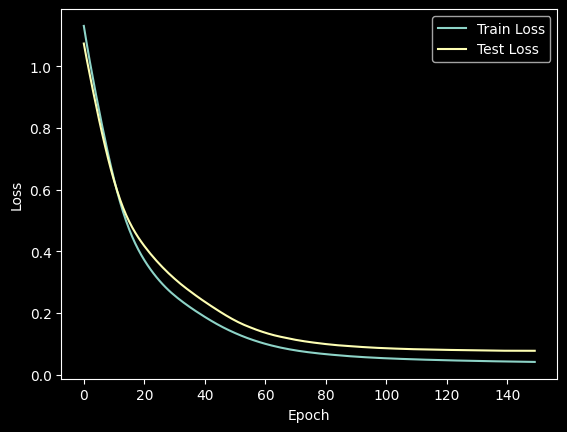

In [166]:
# Plot
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [167]:
# Accuray, f1 score, confusion matrix
def compute_metrics(y_true, y_pred):
    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
    y_true_np = y_true.numpy()
    y_pred_np = y_pred.numpy()
    
    accuracy = accuracy_score(y_true_np, y_pred_np)
    f1 = f1_score(y_true_np, y_pred_np, average='weighted')
    cm = confusion_matrix(y_true_np, y_pred_np)
    
    return accuracy, f1, cm
# Predictions
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train).argmax(dim=1)
    y_test_pred = model(X_test).argmax(dim=1)
# Compute metrics
train_accuracy, train_f1, train_cm = compute_metrics(y_train, y_train_pred)
test_accuracy, test_f1, test_cm = compute_metrics(y_test, y_test_pred)
print(f'Train Accuracy: {train_accuracy:.4f}, F1 Score: {train_f1:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}, F1 Score: {test_f1:.4f}')

Train Accuracy: 0.9833, F1 Score: 0.9833
Test Accuracy: 0.9667, F1 Score: 0.9666


## Redes Neuronales para clasificacion de imagenes

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

dev = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dev

device(type='cuda')

In [3]:
# Hyperparams
ne = 5
bs = 100
lr = 1e-3

In [4]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())


Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [5]:
# Data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=bs, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=bs, shuffle=False)

In [10]:
class DNN(nn.Module):
    def __init__(self, n):
        super(DNN, self).__init__()
        
        # Número de capas (L = número de elementos en n - 1)
        self.L = len(n) - 1
        
        # Función de activación: guardamos la clase, instanciamos por capa
        #actcls = nn.Sigmoid
        #actcls = nn.ReLU
        actcls = nn.Tanh
        
        layers = list()
        # Construye las capas ocultas con su función de activación
        for i in range(self.L - 1):
            layers.append((f'l_{i+1}', nn.Linear(n[i], n[i+1])))  # Capa lineal
            layers.append((f'actfunc_{i+1}', actcls()))          # Activación (nueva instancia por capa)
        
        # Última capa (sin activación)
        layers.append((f'l_{self.L}', nn.Linear(n[-2], n[-1])))
        self.layers = nn.Sequential(OrderedDict(layers))  # Secuencia ordenada de capas
        
    def forward(self, x):
        # Propagación hacia adelante: aplica todas las capas secuencialmente
        return self.layers(x)
    



In [11]:
# Creatiing NN model
input_size = 28*28
output_size = 10

model = DNN(n = [input_size, 100, output_size]).to(dev)

In [12]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [13]:
# Training Loop
nb = len(train_loader)
for epoch in range(ne):
    for batch, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28).to(dev)
        labels = labels.to(dev)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()

        # Update weights
        optimizer.step()

        if (batch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{ne}], Step [{batch+1}/{nb}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [100/600], Loss: 0.3686
Epoch [1/5], Step [200/600], Loss: 0.4263
Epoch [1/5], Step [200/600], Loss: 0.4263
Epoch [1/5], Step [300/600], Loss: 0.2811
Epoch [1/5], Step [300/600], Loss: 0.2811
Epoch [1/5], Step [400/600], Loss: 0.2495
Epoch [1/5], Step [400/600], Loss: 0.2495
Epoch [1/5], Step [500/600], Loss: 0.1948
Epoch [1/5], Step [500/600], Loss: 0.1948
Epoch [1/5], Step [600/600], Loss: 0.2222
Epoch [1/5], Step [600/600], Loss: 0.2222
Epoch [2/5], Step [100/600], Loss: 0.1850
Epoch [2/5], Step [100/600], Loss: 0.1850
Epoch [2/5], Step [200/600], Loss: 0.1471
Epoch [2/5], Step [200/600], Loss: 0.1471
Epoch [2/5], Step [300/600], Loss: 0.1095
Epoch [2/5], Step [300/600], Loss: 0.1095
Epoch [2/5], Step [400/600], Loss: 0.2113
Epoch [2/5], Step [400/600], Loss: 0.2113
Epoch [2/5], Step [500/600], Loss: 0.1091
Epoch [2/5], Step [500/600], Loss: 0.1091
Epoch [2/5], Step [600/600], Loss: 0.2216
Epoch [2/5], Step [600/600], Loss: 0.2216
Epoch [3/5], Step [100/600], Loss:

In [14]:
# Model evaluation
def my_eval(model, data_loader):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in data_loader:
            images = images.reshape(-1, 28*28).to(dev)
            labels = labels.to(dev)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

In [15]:
# Evaluate the model
train_accuracy = my_eval(model, train_loader)
test_accuracy = my_eval(model, test_loader)
print(f'Train Accuracy: {train_accuracy:.2f}%')
print(f'Test Accuracy: {test_accuracy:.2f}%')

Train Accuracy: 97.89%
Test Accuracy: 96.92%


## LBDGS pytorch

In [25]:
def rosenbrock(x):
    val = torch.zeros(1)
    for i in range(1, x.size(0)):
        val += 100.0 * (x[i] - x[i-1]**2.0)**2.0 + (1 - x[i-1])**2.0
    return val

In [26]:
def sphere(x):
    return torch.sum(x**2)

In [33]:
dim = 10
x = torch.randn(dim, requires_grad=True)
iters = 1000
selected_function = rosenbrock
#selected_function = sphere


In [34]:
# LBFGS pytorch
optimizer = torch.optim.LBFGS([x], lr=1.0, max_iter=50000, max_eval=50000, history_size=50, tolerance_change=1.0*np.finfo(float).eps, tolerance_grad=1e-07, line_search_fn='strong_wolfe')



In [35]:
def aux_func():
    # Forward pass
    optimizer.zero_grad()
    f = selected_function(x)
    # Backward pass
    f.backward()
    #Global variable to count iterations
    global iters
    iters += 1
    return f

In [36]:
optimizer.step(aux_func)

tensor([2980.8135], grad_fn=<AddBackward0>)

In [37]:
# Showing stats
print(f'Sol: {x.detach().numpy()}')
print(f'f_val: {selected_function(x).item()}')
print(f'Iterations: {iters}')

Sol: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
f_val: 0.0
Iterations: 1078


## LBFGS optimizer 

In [38]:
# Hyperparams
lr = 1
iters = 0

In [39]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())


In [40]:
# Separating, reshaping and moving to device

X_train = train_dataset.data.view(-1, 28*28).float().to(dev)
y_train = train_dataset.targets.to(dev)

X_test = test_dataset.data.view(-1, 28*28).float().to(dev)
y_test = test_dataset.targets.to(dev)

In [41]:
class DNN(nn.Module):
    def __init__(self, n):
        super(DNN, self).__init__()
        
        # Número de capas (L = número de elementos en n - 1)
        self.L = len(n) - 1
        
        # Función de activación: guardamos la clase, instanciamos por capa
        #actcls = nn.Sigmoid
        #actcls = nn.ReLU
        actcls = nn.Tanh
        
        layers = list()
        # Construye las capas ocultas con su función de activación
        for i in range(self.L - 1):
            layers.append((f'l_{i+1}', nn.Linear(n[i], n[i+1])))  # Capa lineal
            layers.append((f'actfunc_{i+1}', actcls()))          # Activación (nueva instancia por capa)
        
        # Última capa (sin activación)
        layers.append((f'l_{self.L}', nn.Linear(n[-2], n[-1])))
        self.layers = nn.Sequential(OrderedDict(layers))  # Secuencia ordenada de capas
        
    def forward(self, x):
        # Propagación hacia adelante: aplica todas las capas secuencialmente
        return self.layers(x)

In [ ]:
# Crating NN model
input_size = 28*28
output_size = 10

#model = DNN(n = [input_size, 100, output_size]).to(dev)
model = DNN(n = [input_size, 50, 50, output_size]).to(dev)

In [43]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.LBFGS(model.parameters(), lr=lr, max_iter=50000, max_eval=50000, history_size=50, tolerance_change=1.0*np.finfo(float).eps, tolerance_grad=1e-07, line_search_fn='strong_wolfe')

In [44]:
def aux_func():
    # Forward pass
    optimizer.zero_grad()
    y_hat = model(X_train)
    loss = criterion(y_hat, y_train)
    # Backward pass
    loss.backward()
    #Global variable to count iterations
    global iters
    iters += 1
    return loss

In [45]:
# Run optimizer
optimizer.step(aux_func)

# Showing start
print(f'Final Loss: {aux_func().item():.4f}')

Final Loss: 0.0259


In [46]:
def my_eval(model, X, y):
    model.eval()
    with torch.no_grad():
        outputs = model(X)
        _, predicted = torch.max(outputs.data, 1)
        total = y.size(0)
        correct = (predicted == y).sum().item()
    accuracy = 100 * correct / total
    return accuracy

In [47]:
# Evaluate the model
train_accuracy = my_eval(model, X_train, y_train)
test_accuracy = my_eval(model, X_test, y_test)
print(f'Train Accuracy: {train_accuracy:.2f}%')
print(f'Test Accuracy: {test_accuracy:.2f}%')

Train Accuracy: 99.22%
Test Accuracy: 95.16%
